# Simplest use case

## Running a model from the config file

Setting up the `dolphin` ecosystem:

- Install `dolphin`, `lenstronomy`, and the required dependencies.
- Create an input/output directory for `dolphin`, we are using "../io_directory_example" in this example.
- Set up these directories inside the input/output directory. Look inside "../io_directory_example" for example. 
    - **data**: contains subdirectories for each lens system with a data and PSF files for each band.
    - **settings**: contains the 'config_{lens_name}.yml' files for each lens system,
    - **logs**: to write the log files from model runs,
    - **outputs**: to save the model outputs,
    - **hpc**: *optional*, contains scripts to submit batch jobs in MPI.
 

   
### Data format

The image data file needs to be in the hdf5 formate with the following datasets:

- `image_data`: reduced and background subtracted image cutout centered at the lens system,
- `background_rms`: background level,
- `exposure_time`: the map of exposure times for each pixel, so that `image_data * exposure_time` is Poisson noise distributed,
- `ra_at_xy_0`: RA of the (0, 0) pixel in the `image_data` cutout,
- `dec_at_xy_0`: Dec of the (0, 0) pixel in the `image_data` cutout,
- `transform_pix2angle`: a transform matrix to map the pixel numbers (x, y) to angles (RA, Dec).

The PSF data file needs to be in the hdf5 format with the following datasets:

- `kernel_point_source`: a pixelated PSF (not required to have the same dimension of `image_data`),
- `psf_error_map`: *optional*, uncertainty in the provided PSF, needs to have the same dimension of `kernel_point_source`. 

### Config file format

The 'config_{lens_name}.yml' file provides you options to set up the lens model. Here is the content of the config file that is used in the example model below.

### create a `Processor` instance and point to the IO directory

In [75]:
# from dolphin.processor import Processor

# processor = Processor('../io_directory_example/')

### Run a model by calling the  `swim()` method

In [76]:
# processor.swim(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01', recipe_name='galaxy-galaxy')

## Let's check the output

In [77]:
from dolphin.analysis.output import Output

output = Output('../io_directory_example/')

### DESJ0537-4647, All Filters, F140W 0.08" & F200LP 0.05"

In [100]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647', model_id='AllFilters_Run01', band_index=0)

-54.311642010374754 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1729255872606474
reduced chi^2 of data  1 =  190.18474915143574


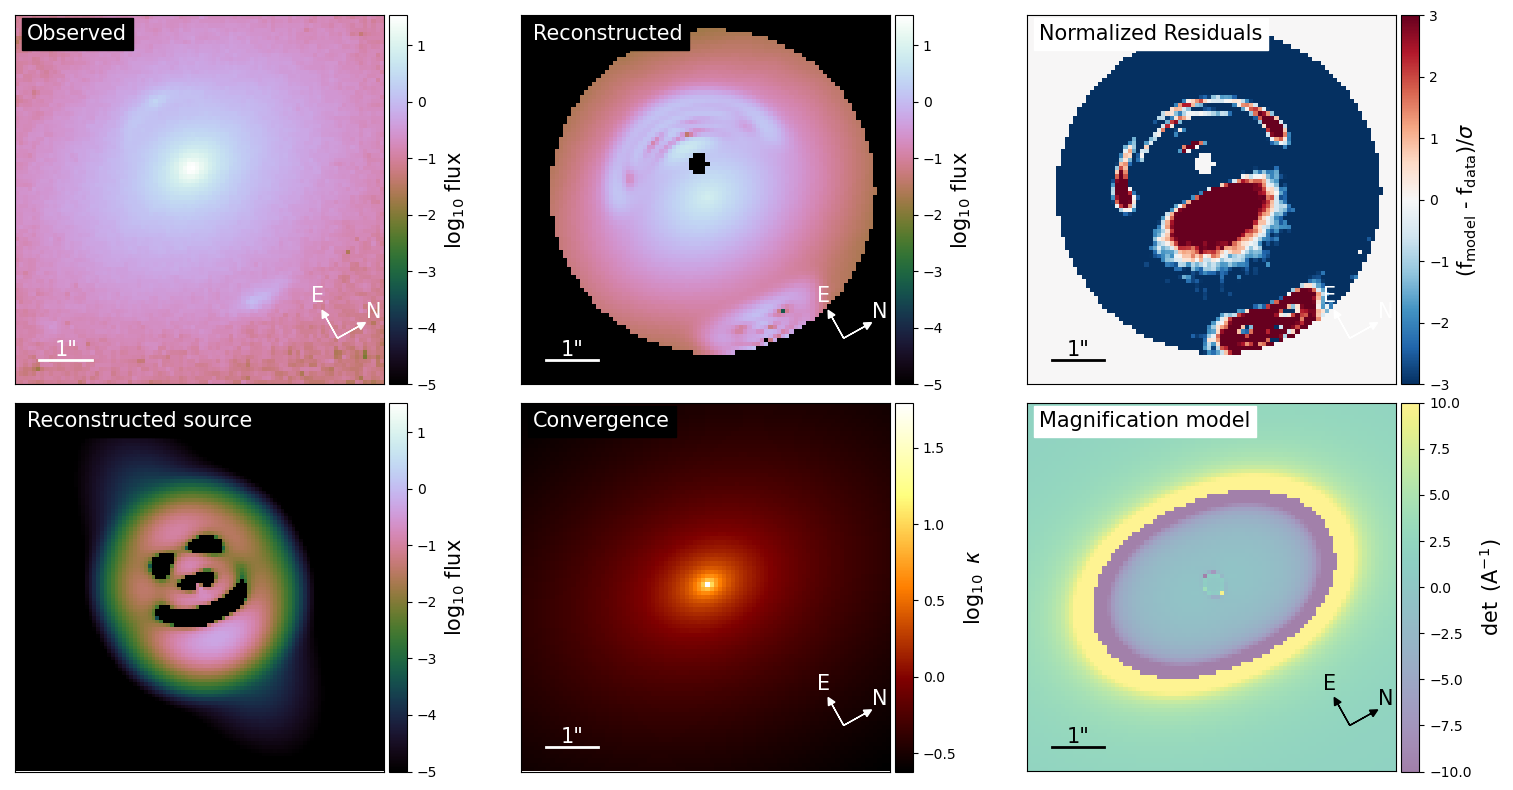

In [79]:
fig = output.plot_model_overview(lens_name='DESJ0537-4647', model_id='AllFilters_Run01', band_index=1)

In [80]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', band_index=0)

-58.241953275757105 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  11.769173960233475
reduced chi^2 of data  1 =  177.07058422730884


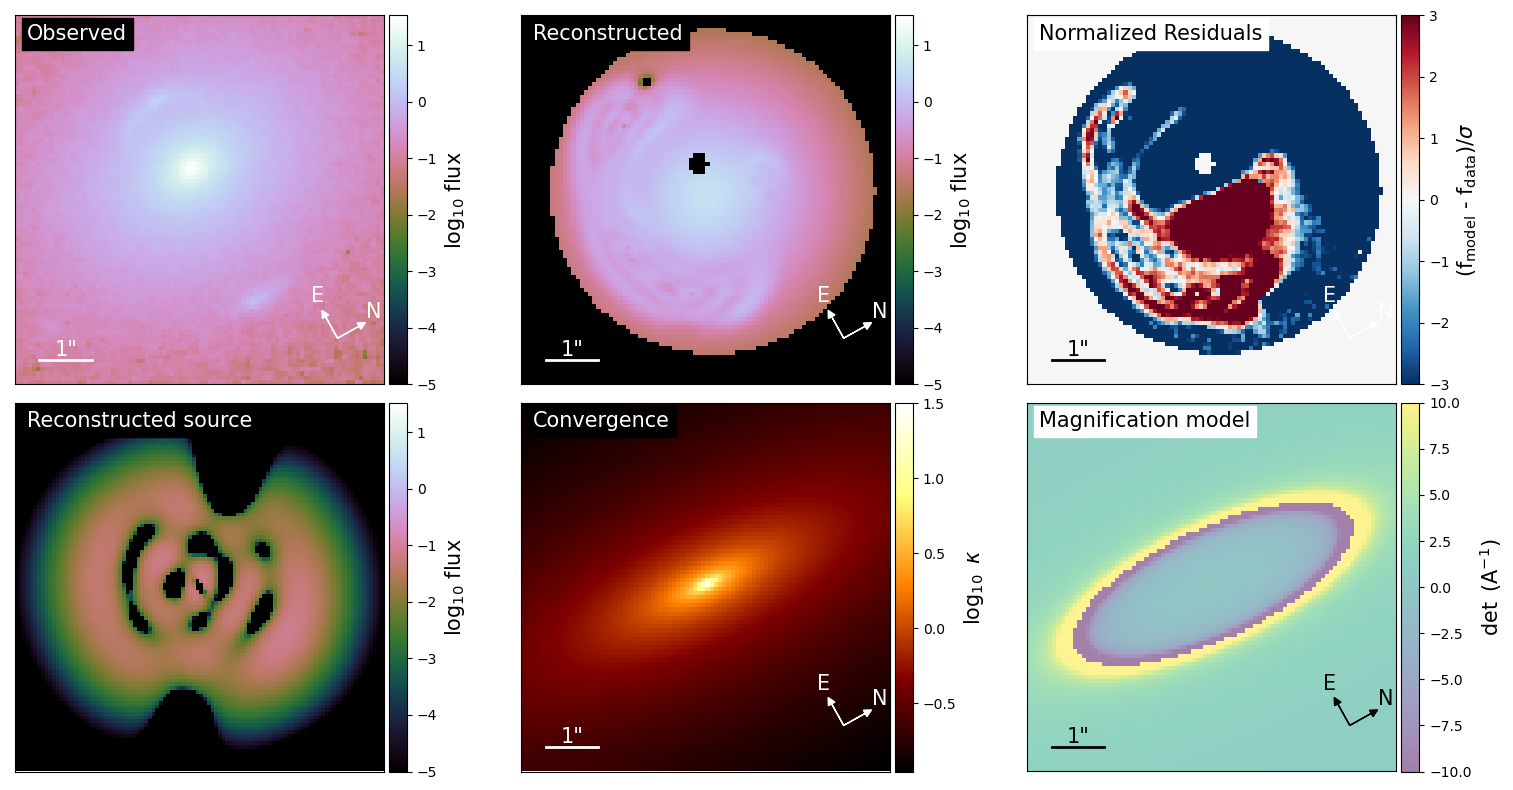

In [81]:
fig = output.plot_model_overview(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', band_index=1)

In [82]:
# output.load_output(lens_name='DESJ0537-4647', model_id='AllFilters_Run01')

In [83]:
# output.plot_mcmc_trace(lens_name='DESJ0537-4647-0008', model_id='AllFilters_Run01', walker_ratio=8)

### DESJ0537-4647, All Filters, F140W 0.13" & F200LP 0.05"

In [84]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01', band_index=0)

In [85]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01', band_index=1)

In [86]:
# output.load_output(lens_name='DESJ0537-4647-0013', model_id='AllFilters_Run01')

In [87]:
# output.plot_mcmc_trace(lens_name='DESJ0537-4647', model_id='AllFilters_0.13_Run01', walker_ratio=8)

### DESJ0537-4647, All Filters, F140W 0.10" & F200LP 0.05"

In [88]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01', band_index=0)

In [89]:
# fig = output.plot_model_overview(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01', band_index=1)

In [90]:
# output.load_output(lens_name='DESJ0537-4647-0010', model_id='AllFilters_Run01')

### DESJ0006-4429

##### All Filters

In [91]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='AllFilters_Run01', band_index=0)

In [92]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='AllFilters_Run01', band_index=1)

In [93]:
# output.load_output(lens_name='DESJ0006-4429', model_id='AllFilters_Run01')

##### F200LP, 0.05"

In [94]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='F200LP_Run01', band_index=0)

In [95]:
# output.load_output(lens_name='DESJ0006-4429', model_id='F200LP_Run01')

##### F140W, 0.08"

In [96]:
# fig = output.plot_model_overview(lens_name='DESJ0006-4429', model_id='F140W_Run01', band_index=0)

In [97]:
# output.load_output(lens_name='DESJ0006-4429', model_id='F140W_Run01')

## Notebook notes

We only ran a pre-sampling optimization here and did not perform a MCMC sampling. So, the above model is the optimized model that the MCMC sample can initiate from. The `kwargs_result` dictionary of the pre-sampling optimization step can be accessed through `Output.kwargs_result` after loading an output using the `Output.load_output()` method.

In [98]:
# output.load_output(lens_name='DESJ0537-4647', model_id='AllFilters_0.13_Run01')

# output.kwargs_result

When necessary, the settings of the model run---that was read out of the 'config_{lens_name}.yml' file---can be accessed through the `output.model_settings` variable.

In [99]:
# output.model_settings